# Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme()
sns.set_style("ticks")
sns.despine()

%matplotlib inline

# Config


In [2]:
DATA_DIR = "./data"


In [3]:
def get_data_path(filename):
    return os.path.join(DATA_DIR, filename)


# Loading Dataset


In [4]:
filepath = get_data_path("train.csv")
df = pd.read_csv(filepath)


In [5]:
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Summary

Below, the data has been summarised. The only thing of value that we can conclude from this summary is that most of the features have missing values. `PassengerId` is the only feature with no missing values. All the other features have missing values, which may or may not need to be handled. Moreover, the `Name` feature may not be that useful.


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Basic Feature Engineering

There are some features that can be engineered without much exploration. Their usability in a model can then be judged.


## Using `PassengerId`

`PassengerId` is formatted as `gggg_pp`, where `gggg` is the ID of the group the passenger was traveling with and `pp` is their number in the group.

> Note: Here, number in the group is not the group size but the position of the passenger in the group.

There are two features that can be extracted from this:

- `GroupId`, which gives us a feature which represents the group a passenger belongs to.
- `GroupSize`, which gives us a feature which indicates the size of the group.


In [7]:
df["PassengerId"].head()


0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

In [8]:
# expand=True returns a DataFrame with numerical columns 0, 1, ...
split_id = df["PassengerId"].str.split("_", expand=True)
split_id.head()


,0,1
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01


In [9]:
df["GroupId"] = split_id[0]
df["GroupSize"] = df.groupby("GroupId")["GroupId"].transform("count")
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1


## Using `Cabin`

`Cabin` is formatted as `deck/num/side`, where `deck` is the deck the cabin is on, `num` is the cabin number and `side` is one of `P` or `S`, for port and starboard respectively.

The following features can be extracted from this:

- `CabinDeck`: Deck on which the passenger's cabin is.
- `CabinId`: Combination of the `deck` and `num` components to get a single cabin number, without the side.
- `CabinSide`: Side the cabin is on.


In [10]:
split_cabin = df["Cabin"].str.split("/", expand=True)
split_cabin.head()


,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [11]:
df["CabinDeck"] = split_cabin[0]
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F


In [12]:
df["CabinId"] = split_cabin[0] + split_cabin[1]
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck,CabinId
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,B0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,F0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,A0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,A0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,F1


In [13]:
df["CabinSide"] = split_cabin[2]
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck,CabinId,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,B0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,F0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,A0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,A0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,F1,S


## Using Expenditure Columns

The expenditure columns can be summed up together to get a total expenditure of the passenger while on board.


In [14]:
expenditure_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df["TotalExpense"] = df[expenditure_cols].sum(axis=1)
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,B0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,F0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,A0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,A0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,F1,S,1091.0


In [15]:
# Move Transported to the end
transported = df["Transported"]
df = df.drop("Transported", axis=1)
df["Transported"] = transported
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0001,1,B,B0,P,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0002,1,F,F0,S,736.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0003,2,A,A0,S,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0003,2,A,A0,S,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0004,1,F,F1,S,1091.0,True


# Types of Features

In this section, we figure out which features are categorical/ordinal and which are numerical. This can be achieved by using `value_counts()` on the columns.


## Categorical/Ordinal Features

We can see that the following features are categorical/ordinal:

- `HomePlanet`
- `CryoSleep`
- `Destination`
- `VIP`
- `GroupId`
- `GroupSize`
- `CabinDeck`
- `CabinId`
- `CabinSide`

All these features are not encoded properly and will require an encoder.


In [16]:
df["HomePlanet"].value_counts()


Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [17]:
df["CryoSleep"].value_counts()


False    5439
True     3037
Name: CryoSleep, dtype: int64

In [18]:
df["Destination"].value_counts()


TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [19]:
df["VIP"].value_counts()


False    8291
True      199
Name: VIP, dtype: int64

In [20]:
df["GroupId"].value_counts()


4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: GroupId, Length: 6217, dtype: int64

In [21]:
df["GroupSize"].value_counts()


1    4805
2    1682
3    1020
4     412
5     265
7     231
6     174
8     104
Name: GroupSize, dtype: int64

In [22]:
df["CabinDeck"].value_counts()


F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

In [23]:
df["CabinId"].value_counts()


G1476    11
C137     10
G734      9
F1411     9
C225      9
         ..
E367      1
B198      1
G940      1
G944      1
B0        1
Name: CabinId, Length: 4453, dtype: int64

In [24]:
df["CabinSide"].value_counts()


S    4288
P    4206
Name: CabinSide, dtype: int64

## Numerical Features

All remaining features are numerical.


# Per-feature Insights


## `Age`


### Null values

There are ~2.06% null values in the `Age` feature.


In [25]:
(df["Age"].isna().sum() / len(df)) * 100


2.0591280340503855

An interesting thing to explore is the relationship between these null `Age` values and `VIP` status.


In [26]:
age_df = df[df["Age"].isna() == True]
age_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense,Transported
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,0052,1,G,G6,S,4689.0,False
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,0068,1,E,E4,S,1048.0,False
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,0149,1,G,G27,S,0.0,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,0202,2,A,A2,P,3754.0,True
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,0206,1,C,C9,S,2981.0,True


Most of these passengers do not are not VIPs.


In [27]:
age_df["VIP"].value_counts()


False    172
True       1
Name: VIP, dtype: int64

It might also be interesting to see their expenditure while they were on board the spaceship. As can be seen, ~75% of these passengers spent less than or equal to $1092.5 while on board.


In [28]:
age_df["TotalExpense"].describe()


count      179.000000
mean      1297.100559
std       2861.793044
min          0.000000
25%          0.000000
50%        595.000000
75%       1092.500000
max      22261.000000
Name: TotalExpense, dtype: float64

It can be seen that most of these passengers didn't spend any money. There are a few outliers where the passengers spent a lot of money.


<AxesSubplot:xlabel='TotalExpense', ylabel='Count'>

<Figure size 432x288 with 1 Axes>

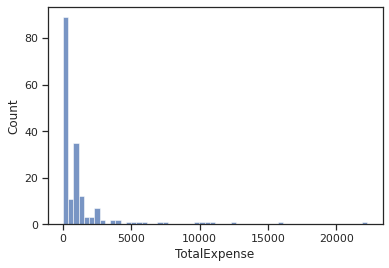

In [29]:
sns.histplot(x=age_df["TotalExpense"])


The passenger Achira Unhaftimle is the only passenger who spent the maximum amount.


In [30]:
age_df[age_df["TotalExpense"] == 22261]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense,Transported
5998,6348_01,Europa,False,C/238/S,55 Cancri e,NaN,False,49.0,13342.0,NaN,1885.0,6985.0,Achira Unhaftimle,6348,1,C,C238,S,22261.0,False


An interesting question here is whether this passenger is associated with any VIP passenger. There are three possibilities.

- There is a passenger who is a VIP and has the same surname as this passenger.
- There is a passenger who is a VIP and has a similar ID as this passenger.
- There is no affiliated passenger.

As can be seen below, no one else with this surname was on board and no one with a similar passenger ID was on board. Seems weird that the agency would not record the age of such a high spender, doesn't it?


In [31]:
names = df[["PassengerId", "Name", "VIP"]]
names[names["Name"].str.contains("Unhaftimle") == True]


,PassengerId,Name,VIP
5998,6348_01,Achira Unhaftimle,False


In [32]:
names[names["PassengerId"].str.contains("6348")]


,PassengerId,Name,VIP
5998,6348_01,Achira Unhaftimle,False


Let's also take a look at the sole VIP member among these passengers. Wow, a Martian!


In [33]:
age_df[age_df["VIP"] == True]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense,Transported
5198,5544_01,Mars,False,F/1149/P,TRAPPIST-1e,NaN,True,1565.0,0.0,0.0,0.0,145.0,Minnys Stité,5544,1,F,F1149,P,1710.0,False


### Summary Statistics

The summary statistics suggest the following:

- Most of the passengers on board were not more than 38 years old. Maybe this could be attributed to younger people being more enthusiastic and healthier to travel in space.
- The variance is not that high.
- There were passengers whose age was recorded as 0 years. Maybe these are newborns.


In [34]:
df["Age"].describe()


count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

An interesting question to ask is what proportion of passengers were more than or equal to the age of 65 years. These people must really enjoy adventure!


In [35]:
df[df["Age"] >= 65].head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense,Transported
118,0126_01,Mars,True,F/27/S,TRAPPIST-1e,67.0,False,0.0,0.0,0.0,0.0,0.0,Milly Mish,0126,1,F,F27,S,0.0,True
280,0310_01,Europa,False,NaN,TRAPPIST-1e,67.0,False,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,0310,1,NaN,NaN,NaN,4947.0,False
338,0378_03,Europa,False,B/11/S,TRAPPIST-1e,79.0,False,5649.0,235.0,7.0,2579.0,2175.0,Naslon Pirejus,0378,7,B,B11,S,10645.0,False
378,0417_01,Europa,True,B/18/P,55 Cancri e,68.0,False,0.0,0.0,0.0,0.0,0.0,Lesatik Poicaptic,0417,3,B,B18,P,0.0,True
416,0453_03,Europa,True,B/14/S,TRAPPIST-1e,74.0,False,0.0,0.0,0.0,0.0,0.0,Wezena Taptiritty,0453,3,B,B14,S,0.0,True


Just ~1.23% of the passengers were what we would call Senior Citizens.


In [36]:
len(df[df["Age"] >= 65]) / len(df) * 100


1.2308754170021856

Let's also take a look at those passengers whose age was recorded as 0 years. An interesting thing to observe would be how many of these passengers were in a group of 1 person.


In [37]:
df[df["Age"] == 0].head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,0017,2,G,G0,P,0.0,True
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,0067,3,G,G10,S,0.0,True
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Stald Hewson,0092,3,G,G9,P,0.0,True
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,0108,3,G,G19,S,0.0,True
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,0179,3,G,G26,P,0.0,False


Only 7 such passengers were on board. Most of them were in a group of 3 people.


In [38]:
df[df["Age"] == 0]["GroupSize"].value_counts()


3    74
4    31
2    24
6    15
7    13
5    12
1     7
8     2
Name: GroupSize, dtype: int64

Let's take a look at just one of these 3-people group. They have the same surnames, suggesting they are part of the same family.


In [39]:
g = df[df["GroupSize"] == 3].groupby("GroupId").filter(lambda x: x["Age"].eq(0).any())
g = g.groupby("GroupId")
g.groups


{'0067': [61, 62, 63], '0092': [85, 86, 87], '0108': [100, 101, 102], '0179': [156, 157, 158], '0193': [169, 170, 171], '0337': [303, 304, 305], '0583': [554, 555, 556], '0684': [652, 653, 654], '0811': [772, 773, 774], '0938': [874, 875, 876], '1325': [1250, 1251, 1252], '1434': [1361, 1362, 1363], '1491': [1410, 1411, 1412], '1615': [1521, 1522, 1523], '1624': [1529, 1530, 1531], '1651': [1555, 1556, 1557], '1669': [1574, 1575, 1576], '1748': [1648, 1649, 1650], '1918': [1799, 1800, 1801], '1962': [1835, 1836, 1837], '2549': [2366, 2367, 2368], '2560': [2383, 2384, 2385], '2602': [2429, 2430, 2431], '2760': [2573, 2574, 2575], '2768': [2581, 2582, 2583], '2807': [2622, 2623, 2624], '2818': [2632, 2633, 2634], '2919': [2720, 2721, 2722], '3100': [2868, 2869, 2870], '3162': [2916, 2917, 2918], '3211': [2964, 2965, 2966], '3519': [3274, 3275, 3276], '3641': [3382, 3383, 3384], '3688': [3420, 3421, 3422], '3923': [3648, 3649, 3650], '3959': [3682, 3683, 3684], '3966': [3691, 3692, 3693], '4000': [3724, 3725, 3726], '4061': [3801, 3802, 3803], '4128': [3851, 3852, 3853], '4400': [4121, 4122, 4123], '4695': [4421, 4422, 4423], '4741': [4459, 4460, 4461], '4798': [4516, 4517, 4518], '5282': [4955, 4956, 4957], '5535': [5187, 5188, 5189], '5545': [5199, 5200, 5201], '5860': [5493, 5494, 5495], '5967': [5604, 5605, 5606], '5969': [5608, 5609, 5610], '5981': [5623, 5624, 5625], '6032': [5688, 5689, 5690], '6360': [6006, 6007, 6008], '6446': [6103, 6104, 6105], '6511': [6165, 6166, 6167], '6662': [6290, 6291, 6292], '6756': [6394, 6395, 6396], '6766': [6407, 6408, 6409], '6894': [6526, 6527, 6528], '7069': [6697, 6698, 6699], '8050': [7526, 7527, 7528], '8064': [7543, 7544, 7545], '8130': [7610, 7611, 7612], '8272': [7751, 7752, 7753], '8508': [7963, 7964, 7965], '8944': [8361, 8362, 8363], '8964': [8385, 8386, 8387], '9013': [8438, 8439, 8440], '9231': [8653, 8654, 8655], '9275': [8685, 8686, 8687]}

In [40]:
g.get_group("0067")


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense,Transported
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,0067,3,G,G10,S,0.0,True
62,0067_02,Earth,False,G/10/S,TRAPPIST-1e,18.0,False,1.0,258.0,446.0,0.0,0.0,Celine Leeves,0067,3,G,G10,S,705.0,True
63,0067_03,Earth,False,F/15/S,55 Cancri e,21.0,False,1946.0,37.0,0.0,0.0,24.0,Velyne Leeves,0067,3,F,F15,S,2007.0,False


### Distribution

We visualize `Age` as a density plot. The distribution seems fairly normal with a very slight skew. This likely doesn't need any transformations for non-tree based algorithms and can be used as is in any tree-based algorithm.


<AxesSubplot:xlabel='Age', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

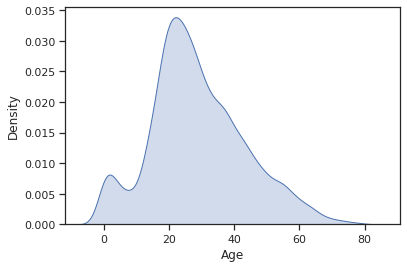

In [41]:
sns.kdeplot(data=df, x="Age", fill=True)


### Distribution by Target

Below, we visualize the distribution of `Age` for each value of `Transported.` There is a very small difference in the two distributions.


<AxesSubplot:xlabel='Age', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

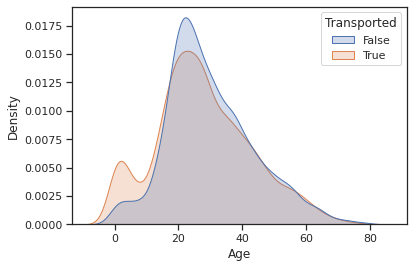

In [42]:
sns.kdeplot(data=df, x="Age", hue="Transported", fill=True)


As can be seen, the distributions are almost identical.


<AxesSubplot:xlabel='Age', ylabel='Count'>

<Figure size 432x288 with 1 Axes>

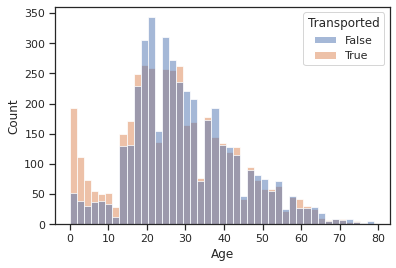

In [43]:
sns.histplot(data=df, x="Age", hue="Transported")


### Null Values and Target

There isn't much difference between the transportation rates. This suggests using `Age` for using presence of missing values as a feature may not be useful.

<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

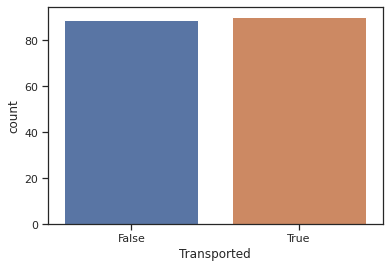

In [44]:
sns.countplot(data=df[df["Age"].isna()], x="Transported")

## Expenditure Features

Since there are only 6 expenditure features, they can be analyzed together.


In [45]:
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExpense']

### Null Values

None of them have more than ~2.4% null values. There are no null values in `TotalExpense` since we decided to skip nulls when calculating it.


In [46]:
(df[expenditure_cols].isna().sum() / len(df)) * 100


RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
TotalExpense    0.000000
dtype: float64

### Summary Statistics

The summary statistics highlight the following:

- Most people on board didn't spend a lot of money, since the median is $0 for the individual categories and only $716 for the total expense.
- There was at least one passenger on board who spent almost $36,000 (!) while on board.
- There's a huge variation in the expenditures since all the standard deviations are large.


In [47]:
df[expenditure_cols].describe()


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExpense
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791,1440.866329
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000,1441.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


Lets' take a look at the passengers who spent almost $36,000. There's only one such passenger. It's interesting how this passenger is not a VIP. They also seem to love food and the spa. In fact, they spent the highest amount of money on the spa among all the passengers! They must be _really_ stressed out.


In [48]:
df[df["TotalExpense"] > 35000]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense,Transported
5722,6064_01,Europa,False,C/186/P,55 Cancri e,68.0,False,125.0,13437.0,0.0,22408.0,17.0,Markar Radisiouss,6064,1,C,C186,P,35987.0,False


In [49]:
df[df["Spa"] == df["Spa"].max()]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense,Transported
5722,6064_01,Europa,False,C/186/P,55 Cancri e,68.0,False,125.0,13437.0,0.0,22408.0,17.0,Markar Radisiouss,6064,1,C,C186,P,35987.0,False


### Distribution

Clearly, all the expenditure features are heavily right-skewed. This is natural since very few passengers spent a lot of money while on board. They will need some sort of transformation for non-tree based algorithms so that they follow a normal distribution.


<AxesSubplot:xlabel='RoomService', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

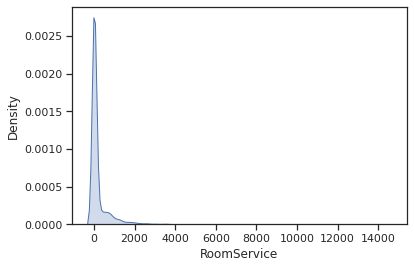

In [50]:
sns.kdeplot(data=df, x="RoomService", fill=True)


<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

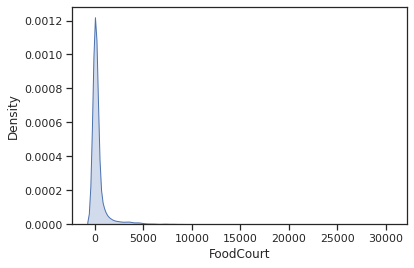

In [51]:
sns.kdeplot(data=df, x="FoodCourt", fill=True)


<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

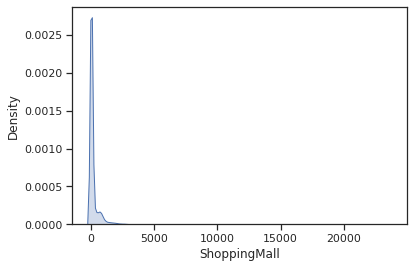

In [52]:
sns.kdeplot(data=df, x="ShoppingMall", fill=True)


<AxesSubplot:xlabel='Spa', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

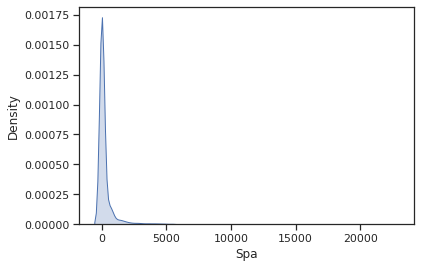

In [53]:
sns.kdeplot(data=df, x="Spa", fill=True)


<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

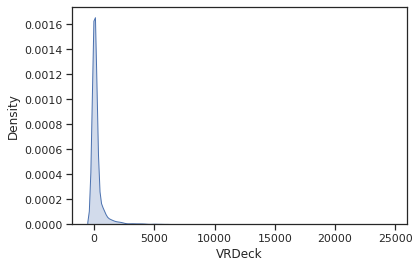

In [54]:
sns.kdeplot(data=df, x="VRDeck", fill=True)


<AxesSubplot:xlabel='TotalExpense', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

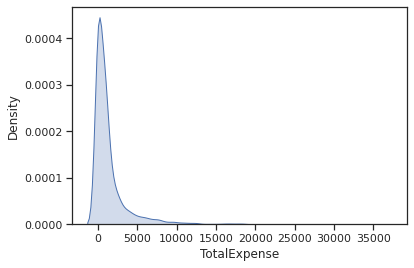

In [55]:
sns.kdeplot(data=df, x="TotalExpense", fill=True)


### Distribution by Target

In all the cases, there seems to be a significant difference between transportation chances based on expenditure.


<AxesSubplot:xlabel='RoomService', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

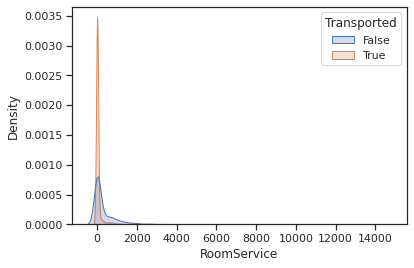

In [56]:
sns.kdeplot(data=df, x="RoomService", hue="Transported", fill=True)


<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

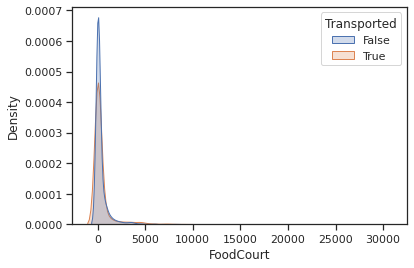

In [57]:
sns.kdeplot(data=df, x="FoodCourt", hue="Transported", fill=True)


<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

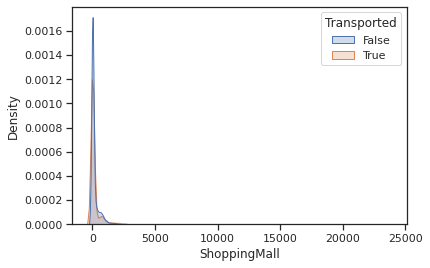

In [58]:
sns.kdeplot(data=df, x="ShoppingMall", hue="Transported", fill=True)


<AxesSubplot:xlabel='Spa', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

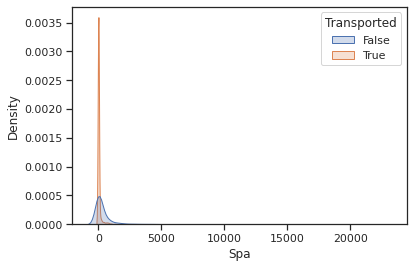

In [59]:
sns.kdeplot(data=df, x="Spa", hue="Transported", fill=True)


<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

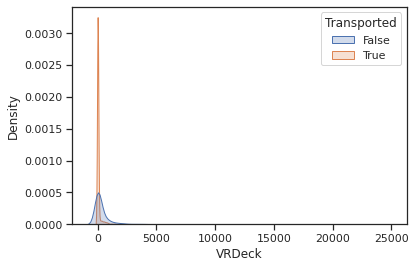

In [60]:
sns.kdeplot(data=df, x="VRDeck", hue="Transported", fill=True)


Most of the people who did not spend a lot of money were transported. It also shows that there is much more variability in the expense of people who were not transported than in those who were.

<AxesSubplot:xlabel='TotalExpense', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

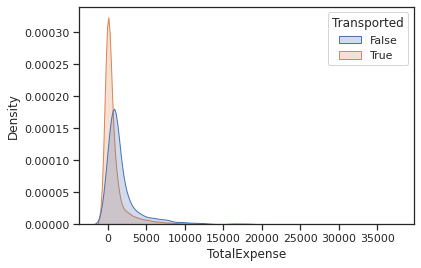

In [61]:
sns.kdeplot(data=df, x="TotalExpense", hue="Transported", fill=True)


In [62]:
false_std = df[df["Transported"] == False]["TotalExpense"].std()
true_std = df[df["Transported"] == True]["TotalExpense"].std()
false_std, true_std

(3137.4143209347644, 2297.838344471371)

### Null Values And Target

Shere are no null values in `TotalExpense`. Let's look at null values in other expenditure columns. Clearly, only `RoomService`, `FoodCourt` and `ShoppingMall` have some difference in transportation rates. In case of `Spa`, the difference is just 1 passenger and in case of `VRDeck`, the difference is just 8 passengers.

This suggests that, if we were planning to use the presence of missing values as a feature, using `VRDeck` and `Spa` may not add much to the prediction power of a model.

<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

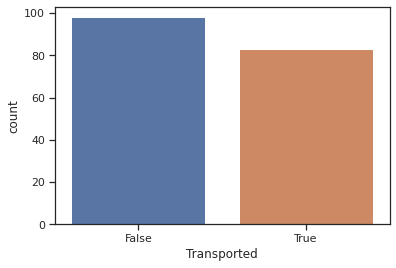

In [63]:
sns.countplot(data=df[df["RoomService"].isna()], x="Transported")

<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

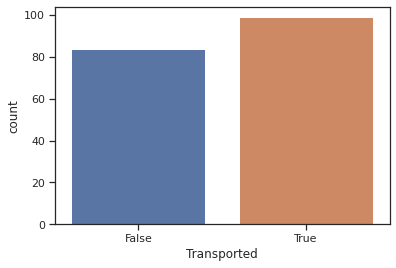

In [64]:
sns.countplot(data=df[df["FoodCourt"].isna()], x="Transported")


<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

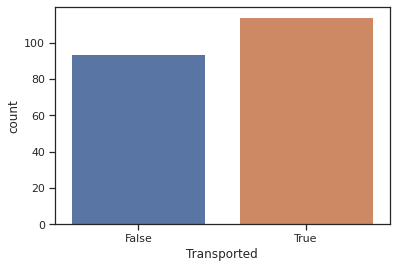

In [65]:
sns.countplot(data=df[df["ShoppingMall"].isna()], x="Transported")


<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

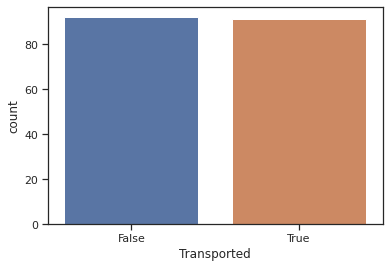

In [66]:
sns.countplot(data=df[df["Spa"].isna()], x="Transported")

In [67]:
df[df["Spa"].isna()]["Transported"].value_counts()

False    92
True     91
Name: Transported, dtype: int64

<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

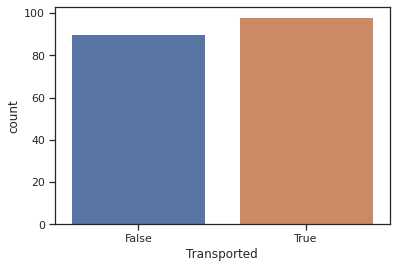

In [68]:
sns.countplot(data=df[df["VRDeck"].isna()], x="Transported")

In [69]:
df[df["VRDeck"].isna()]["Transported"].value_counts()

True     98
False    90
Name: Transported, dtype: int64

## `CabinDeck`

### Null Values

There are roughly ~2.3% null values in the feature.

In [70]:
(df["CabinDeck"].isna().sum() / len(df)) * 100

2.289198205452663

### Summary statistics

Most of the passengers (2794) were on deck `F`.

In [71]:
df["CabinDeck"].describe()

count     8494
unique       8
top          F
freq      2794
Name: CabinDeck, dtype: object

### Distribution by Target

According to the plot, most passengers on decks `B` and `G` were transported. But the difference is less significant for deck `G`.

<seaborn.axisgrid.FacetGrid object at 0x7f0beb880070>

<Figure size 440.55x360 with 1 Axes>

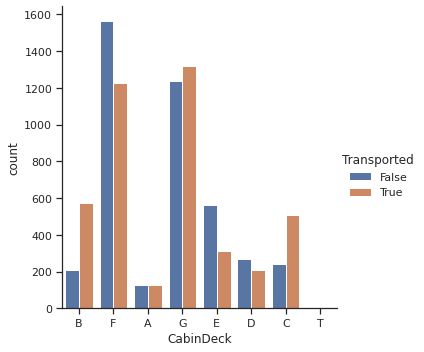

In [72]:
sns.catplot(data=df, x="CabinDeck", hue="Transported", kind="count")

Let's investigate the relationship between cabin deck, total expense and transported status.

/home/malay_agarwal/anaconda3/envs/dl/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<seaborn.axisgrid.FacetGrid object at 0x7f0beb165a50>

<Figure size 944.55x432 with 8 Axes>

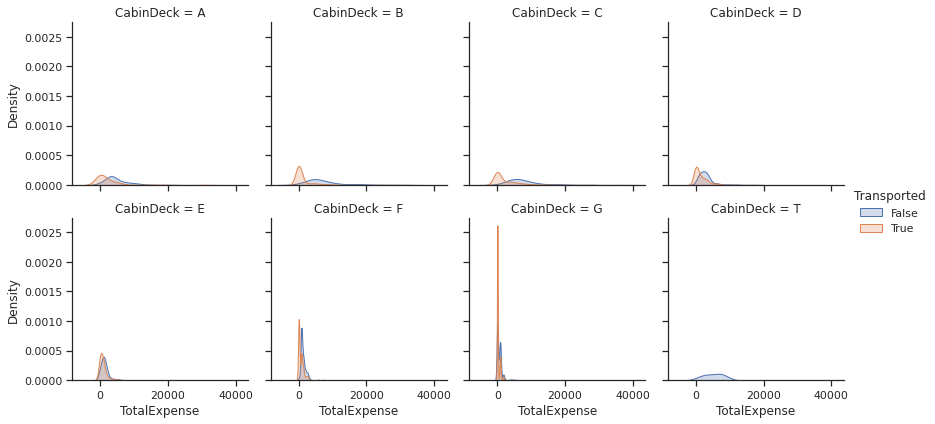

In [73]:
order = ["A", "B", "C", "D", "E", "F", "G", "T"]
g = sns.FacetGrid(
    data=df[df["CabinDeck"].notna()],
    col="CabinDeck",
    hue="Transported",
    col_wrap=4,
    col_order=order,
)
g.map(sns.kdeplot, "TotalExpense", fill=True)
g.add_legend()

It's visible that the peak observed in `TotalExpense` for people who were transported (see `Distribution by Target` section in `Expenditure Features`) is mostly contributed by passengers on deck `G`. This tells us, based on the dependence of transportation chances on expenditure, that `G` is a more modest deck, possibly occupied by low spenders.

As can be seen in the summary below, deck G has the lowest mean and median expenditure. The next is `F` and the two plots above show that they both combine to dominate the number of people transported.
 
Moreover, `T`, the deck with no passengers who were transported, has the highest mean and median expenditure.

In [74]:
df.groupby("CabinDeck").agg({"TotalExpense": ["mean", "median"]})

TotalExpense 
 
 
 
 mean 
 median 
 
 
 CabinDeck 
 
 
 
 
 
 
 A 
 3402.304688 
 2489.5 
 
 
 B 
 2927.833119 
 0.0 
 
 
 C 
 4105.906292 
 3104.0 
 
 
 D 
 2289.520921 
 1786.5 
 
 
 E 
 1298.772831 
 849.0 
 
 
 F 
 982.766285 
 800.5 
 
 
 G 
 381.035170 
 0.0 
 
 
 T 
 4716.400000 
 3778.0

## `GroupSize`

In [75]:
df["GroupSize"] = df["GroupSize"].astype("category")

### Null values

There are no null values in `GroupSize` since this is derived from `PassengerId`.

In [76]:
(df["GroupSize"].isna().sum() / len(df)) * 100

0.0

### Summary Statistics

Most passengers (4805) were traveling alone.

In [77]:
df["GroupSize"].describe()

count     8693
unique       8
top          1
freq      4805
Name: GroupSize, dtype: int64

### Distribution by Target

Since most of the passengers were traveling alone, they dominate the share of passengers who were transported. Most of those who were traveling alone were not transported. But, as soon as we get to a group of size 2 or more, we see that passengers were more likely to be transported, except for groups of size 8.

<seaborn.axisgrid.FacetGrid object at 0x7f0beb1b1b10>

<Figure size 440.55x360 with 1 Axes>

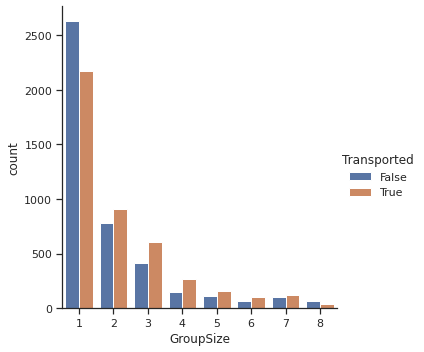

In [78]:
sns.catplot(data=df, x="GroupSize", hue="Transported", kind="count")

## `CryoSleep`

### Null values

There are ~2.5% null values in this feature.

In [79]:
(df["CryoSleep"].isna().sum() / len(df)) * 100

2.4962613597147127

Let's take a look at the VIP status of these null values. Most of them were non-VIP passengers, with only 3 VIP passengers. It's interesting how the feature was not recorded for these 3 VIP passengers.

In [80]:
df[df["CryoSleep"].isna()]["VIP"].value_counts()

False    207
True       3
Name: VIP, dtype: int64

### Summary Statistics

Most of the passengers (5439) did not opt for cryosleep.

In [81]:
df["CryoSleep"].describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

Let's take a look at the expenditure of these passengers. As expected, passengers in cryosleep did not spend any money.

In [82]:
df.groupby("CryoSleep")["TotalExpense"].describe()

,count,mean,std,min,25%,50%,75%,max
CryoSleep,,,,,,,,
False,5439.0,2248.299687,3245.061489,0.0,746.0,1019.0,2416.0,35987.0
True,3037.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### Distribution by Target

Most of the passengers who did not opt for cryosleep were not transported while most of those who did were transported. This might be because the passengers in cryosleep were confined to their cabins and wouldn't have been able to take any action to save themselves.

<seaborn.axisgrid.FacetGrid object at 0x7f0be6fb34c0>

<Figure size 440.55x360 with 1 Axes>

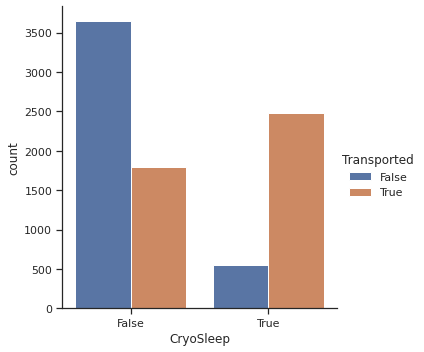

In [83]:
sns.catplot(data=df, x="CryoSleep", kind="count", hue="Transported")

There were 554 passengers who were in cryosleep but still were not transported. Since there isn't any direct way of ascertaining how these passengers survived, we can just assume that they were lucky. It is also possible that they were woken up by someone. 

In [84]:
len(df[df["CryoSleep"] & (~df["Transported"])])

554

### Null Values and Target

There's a difference of just 5 passengers between the transportation chances based on null values. Using this when using presence of missing values as a feature may not be that helpful.

<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

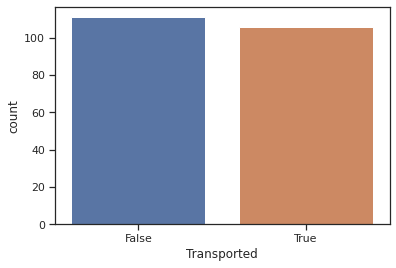

In [85]:
sns.countplot(data=df[df["CryoSleep"].isna()], x="Transported")

In [86]:
df[df["CryoSleep"].isna()]["Transported"].value_counts()

False    111
True     106
Name: Transported, dtype: int64

## `HomePlanet`

### Null Values

There are ~2.3% null values in the feature. So far, looking at the trends in other features, it seems likely that these null values have been artificially created and hence, follow a uniform distribution across features.

In [87]:
(df["HomePlanet"].isna().sum() / len(df)) * 100

2.312205222592891

### Summary Statistics

Most of the passengers (4602) were traveling from `Earth`.

In [88]:
df["HomePlanet"].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

### Distribution by Target

More passengers from `Earth` were not transported. The difference in transportation rates for passengers from `Mars` is not that significant.

<seaborn.axisgrid.FacetGrid object at 0x7f0beb0509d0>

<Figure size 440.55x360 with 1 Axes>

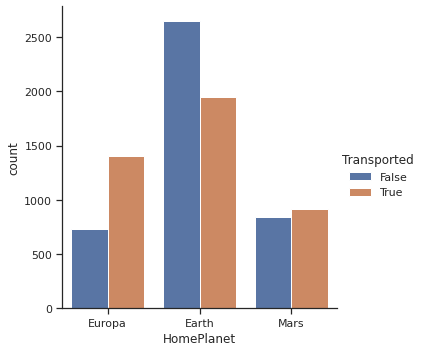

In [89]:
sns.catplot(data=df, x="HomePlanet", hue="Transported", kind="count")

### Null Values and Target

The difference in transportation rates based on null values is not that significant, with just 5 more passengers being transported than not transported. Using this when using presence of missing values as a feature may not be that useful.

<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

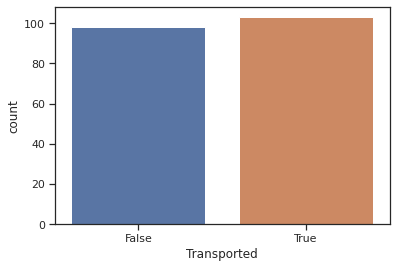

In [90]:
sns.countplot(data=df[df["HomePlanet"].isna()], x="Transported")

In [91]:
df[df["HomePlanet"].isna()]["Transported"].value_counts()

True     103
False     98
Name: Transported, dtype: int64

## `Destination`

### Null Values

There are ~2.1% null values in the feature.

In [92]:
(df["Destination"].isna().sum() / len(df)) * 100

2.093638559760727

### Summary Statistics

Most of the passengers (5915) were traveling to `TRAPPIST-1e`.

In [93]:
df["Destination"].describe()

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

### Distribution by Target

Among the passengers traveling to `55 Cancri e`, most were transported. The difference is not that significant for passengers traveling to `PSO J318.5-22`. Among those traveling to `TRAPPIST-1e`, most were not transported.

<seaborn.axisgrid.FacetGrid object at 0x7f0be6a0fac0>

<Figure size 440.55x360 with 1 Axes>

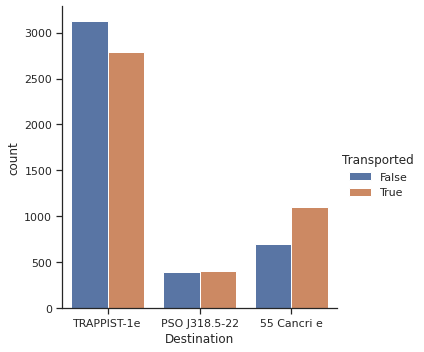

In [94]:
sns.catplot(data=df, x="Destination", hue="Transported", kind="count")

### Null Values and Target

There isn't much difference between the transportation rates. `Destination` may not be a good candidate when using presence of missing values as a feature.

<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

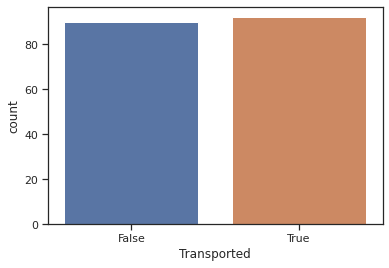

In [95]:
sns.countplot(data=df[df["Destination"].isna()], x="Transported")

## `CabinSide`

### Null Values

There are ~2.3% null values in the feature.

In [96]:
(df["CabinSide"].isna().sum() / len(df)) * 100

2.289198205452663

### Summary Statistics

Almost the same number of passengers had cabins on the starboard and port sides, with almost a 50-50 split.

In [97]:
df["CabinSide"].describe()

count     8494
unique       2
top          S
freq      4288
Name: CabinSide, dtype: object

### Distribution by Target

Among those transported, most were passengers with cabins on the starboard (`S`) side. Port (`P`) side passengers were less likely to be transported. 

<seaborn.axisgrid.FacetGrid object at 0x7f0be6793b20>

<Figure size 440.55x360 with 1 Axes>

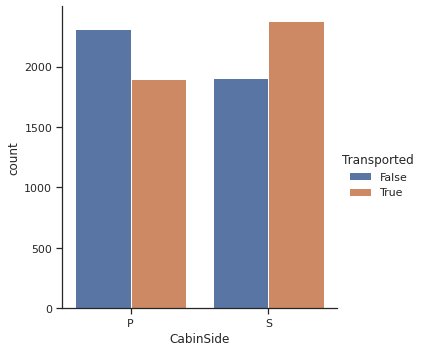

In [98]:
sns.catplot(data=df, x="CabinSide", hue="Transported", kind="count")

### Null values and Target

There's almost no difference between transportation rates based on null values, suggesting that `CabinSide` is not a good candidate when using presence of missing values as a feature.

<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

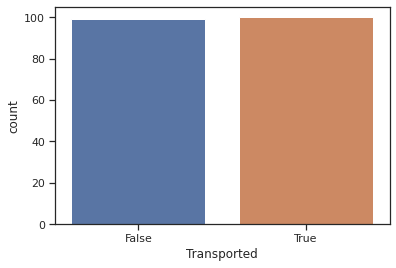

In [99]:
sns.countplot(data=df[df["CabinSide"].isna()], x="Transported")

In [100]:
df[df["CabinSide"].isna()]["Transported"].value_counts()

True     100
False     99
Name: Transported, dtype: int64

## `VIP`

### Null Values

There are ~2.3% null values in the feature.

In [101]:
(df["VIP"].isna().sum() / len(df)) * 100

2.3352122397331185

### Summary Statistics

There were very few VIPs on board. More than 97% of the passengers were non-VIPs.

In [102]:
df["VIP"].describe()

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object

### Distribution by Target

VIPs were slightly less likely to be transported while it was the opposite for non-VIPs.

<seaborn.axisgrid.FacetGrid object at 0x7f0be65d02e0>

<Figure size 440.55x360 with 1 Axes>

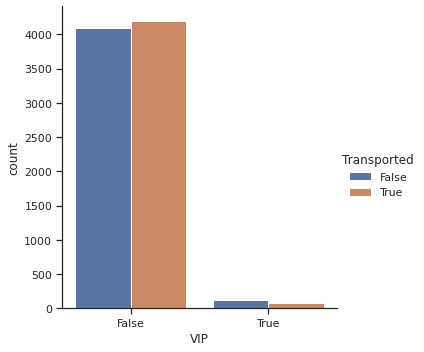

In [103]:
sns.catplot(data=df, x="VIP", hue="Transported", kind="count")

### Null Values and Target

There's almost no difference between transportation rates based on null values, making this a poor candidate for using presence of missing values as a feature.

<AxesSubplot:xlabel='Transported', ylabel='count'>

<Figure size 432x288 with 1 Axes>

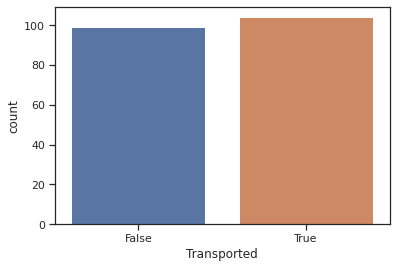

In [104]:
sns.countplot(data=df[df["VIP"].isna()], x="Transported")

In [105]:
df[df["VIP"].isna()]["Transported"].value_counts()

True     104
False     99
Name: Transported, dtype: int64

### `GroupId`

`GroupId` is a very dense categorical feature, with 6217 levels. It doesn't make sense to try to plot this feature. A better way to judge its usability is to train the same model once with the feature and once without the feature and see which one yields better results.

### Null Values

There are no null values in `GroupId` since it is derived from `PassengerId`.

In [106]:
(df["GroupId"].isna().sum() / len(df)) * 100

0.0

### Summary Statistics

This doesn't really give us much insight since there are multiple group IDs with a frequency of 8. What it tells is something we already know: The largest groups had 8 passengers in them.

In [107]:
df["GroupId"].astype("category").describe()

count     8693
unique    6217
top       4498
freq         8
Name: GroupId, dtype: object

## `CabinId`

`CabinId` is a very dense categorical feature, with 4453 levels. Similar to `GroupId`, a better way to judge its usability is to train the same model once with the feature and once without the feature and see which one yields better results.

### Null Values

There are approximately ~2.3% null values in the feature.

In [108]:
(df["CabinId"].isna().sum() / len(df)) * 100

2.289198205452663

### Summary Statistics

This tells us that the cabin IDs with the most number of passengers had 11 passengers.

In [109]:
df["CabinId"].describe()

count      8494
unique     4453
top       G1476
freq         11
Name: CabinId, dtype: object

The number people with the same cabin ID could also become a feature.

In [110]:
df["CabinOccupancy"] = df.groupby("CabinId")["CabinId"].transform("count")
df["CabinOccupancy"].value_counts()

2.0     3432
1.0     1947
3.0     1224
4.0      760
5.0      460
6.0      312
7.0      231
8.0       80
9.0       27
11.0      11
10.0      10
Name: CabinOccupancy, dtype: int64

The plot below shows that there are differences between transportation rates based on this feature.

<seaborn.axisgrid.FacetGrid object at 0x7f0be65d0e20>

<Figure size 440.55x360 with 1 Axes>

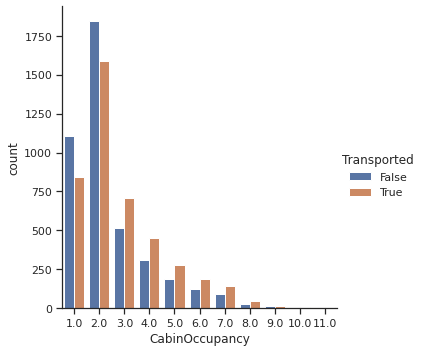

In [111]:
sns.catplot(data=df, x="CabinOccupancy", hue="Transported", kind="count")